### Case Study 4 :  Data Science Shark Tank:  Pitch Your Ideas

** Due Date: December 7, 6pm**
BEFORE the beginning of class at 6:00pm
NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

<img src="https://cp.inkrefuge.com/images%5Cpressreleases/shark%20tank_large.jpg" width="400px"> 

After the previous 3 case studies,  your team is now equipped with the three powerful skills of data science: Hacking skill, Business skill and Math skill. In this project, your team is going to make use of these skills to come up with an idea of a new business/startup based upon data science technology. Your goal is to design a better service/solution on any data you like, develop a prototype/demo and prepare a pitch for your idea.
* Your team needs to decide which business problem is important for the market you are joining in (for example, social media market, housing market, search market, etc.).
* Then design a data science approach to improve one of the current services or design a new service on any data that you choose.
* The solution should include all the three components of data science: 1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how much are you evaluating the company; How are you planing to persuade the sharks to invest in your business; 2) the mathematical part to formulate the problem and develop math solution; 3) the programming part to collect the data, implement the math solution, and develop the prototype/demo.
* NOTE, as opposed to the first three case studies, case study 4 is much more open ended.  
  * Business is the focus
  * All three parts need to appear (Business, Computer Science, and Math)
  * However, the precise balance is up to you.

# Background about Elevator Pitch (90 seconds) and Shark Tank

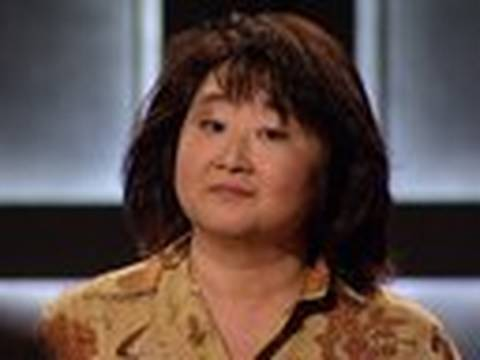

In [35]:
from IPython.display import YouTubeVideo
YouTubeVideo("3UuFR4Y4uw8") 

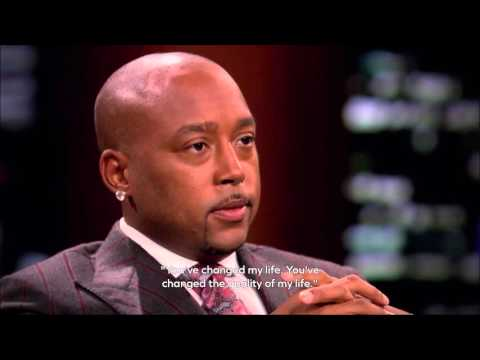

In [36]:
YouTubeVideo("xIq8Sg59UdY") 

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 
* LinkedIn API: https://developer.linkedin.com/docs/rest-api
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on.
Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. 
Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could make a big difference with data science technology.
How are you planing to persuade the investors to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:  

    Detecting the quality of wines and which wines are similar to each other.

2) Why the problem is important to solve? 

    

3) What is your idea to solve the problem? 


4) What differences you could make with your data science approach?


5) Why do you believe the idea deserves the investment of the "sharks"?






### Problem 2: The Math Part (20 points)

Define the business problem as a math problem and design a math solution to the problem.


**Insert your answers here**


1) Problem formulation in Math:

    Before we read the data, we relabel the quality into 5 category. Originally we have category3, 4, 5, 6, 7, 8, 9, they are easily understand and too separated, so 
    #we relabel 3 into 1; 4,5 into 2; 6 into 3; 7,8 into 4; 9 into 5
    Then we need to reduce the amount of our chemical attributes in our experiment, because many features will not influence the quality or they are not really important, so we apply feature selection to the data we have.
    In order to predict the quality of a new wine, we need to build a model base on the existing wine dataset. Using classification methods, we can find a pattern using wine chemical features to predict their quality. 
    To find the similar wines and recommand them to customers, we use clustering methods to find which wines are clustered together from all 5000 wines and know these wines are high similar to each other. 


2) Math Solution:

    Feature Selection: Lasso

    Classification: Linear Regression, Linear SVC, K Nearest Neighbor, Decision Tree, Random Forest;
    
    Clustering: K-means;

3) Implementation of the Solution
    Shown below.

In [29]:
#before we read the data, we relabel the quality into 5 category
#originally we have category3, 4, 5, 6, 7, 8, 9
#we relabel 3 into 1; 4,5 into 2; 6 into 3; 7,8 into 4; 9 into 5

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tflearn.data_utils import shuffle
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10
fixed_acidity=[]
volatile_acidity=[]
citric_acid=[]
residual_sugar=[]
chlorides=[]
free_sulfur_dioxide=[]
total_sulfur_dioxide=[]
density=[]
pH=[]
sulphates=[]
alcohol=[]
quality=[]

with open('winequality-white2.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    i=0
    for row in spamreader:
        if i>0:
            fixed_acidity.append(row[0])
            volatile_acidity.append(row[1])
            citric_acid.append(row[2])
            residual_sugar.append(row[3])
            chlorides.append(row[4])
            free_sulfur_dioxide.append(row[5])
            total_sulfur_dioxide.append(row[6])
            density.append(row[7])
            pH.append(row[8])
            sulphates.append(row[9])
            alcohol.append(row[10])
            quality.append(row[11])
        i+=1
# data=pd.DataFrame({"x":fixed_acidity,"y":quality,"x_2":volatile_acidity,"x_3":citric_acid,"x_4":residual_sugar,\
#              "x_5":chlorides,"x_6":free_sulfur_dioxide,"x_7":total_sulfur_dioxide,"x_8":density,"x_9":pH,\
#              "x_10":sulphates,"x_11":alcohol})
# print(data.head())

y=np.asarray(quality,dtype=np.int32)
x=np.asarray(fixed_acidity,dtype=np.float32)
x_2=np.asarray(volatile_acidity,dtype=np.float32)
x_3=np.asarray(citric_acid,dtype=np.float32)
x_4=np.asarray(residual_sugar,dtype=np.float32)
x_5=np.asarray(chlorides,dtype=np.float32)
x_6=np.asarray(free_sulfur_dioxide,dtype=np.float32)
x_7=np.asarray(total_sulfur_dioxide,dtype=np.float32)
x_8=np.asarray(density,dtype=np.float32)
x_9=np.asarray(pH,dtype=np.float32)
x_10=np.asarray(sulphates,dtype=np.float32)
x_11=np.asarray(alcohol,dtype=np.float32)
x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11=shuffle(x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11)
data=pd.DataFrame({"x":x,"y":y,"x_2":x_2,"x_3":x_3,"x_4":x_4,\
              "x_5":x_5,"x_6":x_6,"x_7":x_7,"x_8":x_8,"x_9":x_9,\
              "x_10":x_10,"x_11":x_11})



/Users/Nathan/anaconda/envs/Py501/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


[183, 1457, 2198, 880, 180]


([<matplotlib.axis.XTick at 0x1a25b27e48>,
 <a list of 5 Text xticklabel objects>)

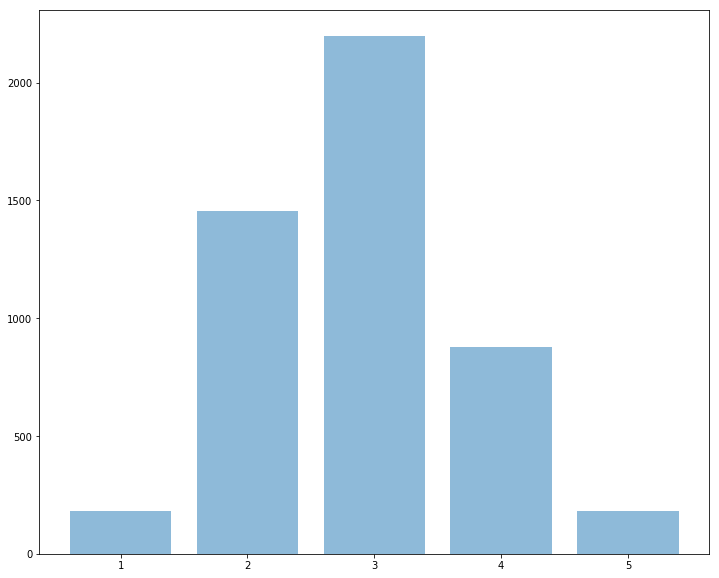

In [30]:
count=[0]*5
for i in y:
    count[i-1]+=1
print(count)
import matplotlib.pyplot as plt
objects = ('1', '2', '3', '4', '5')
y_pos = np.arange(len(objects))
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

In [31]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [32]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,12)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,12)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
# models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i])
print(coef_matrix_lasso)
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

                  rss intercept   coef_x_1 coef_x_2     coef_x_3   coef_x_4  \
alpha_1e-15   2649.44   144.951  0.0685271 -1.84106   0.00791661  0.0802873   
alpha_1e-10   2649.44   144.951   0.068527 -1.84106   0.00791654  0.0802873   
alpha_1e-08   2649.44   144.941  0.0685177 -1.84106   0.00790933  0.0802833   
alpha_1e-05   2649.63   135.261  0.0591682 -1.84449  0.000636784  0.0762901   
alpha_0.0001  2662.21    66.849         -0 -1.84546           -0  0.0475014   
alpha_0.001   2850.41  0.417518         -0 -1.20392           -0          0   
alpha_0.01    3719.61   2.88097         -0       -0           -0         -0   
alpha_1       3719.61   2.88097         -0       -0           -0         -0   
alpha_5       3719.61   2.88097         -0       -0           -0         -0   
alpha_10      3719.61   2.88097         -0       -0           -0         -0   

              coef_x_5     coef_x_6     coef_x_7 coef_x_8  coef_x_9 coef_x_10  \
alpha_1e-15  -0.174635   0.00404662  -0.00028655 

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      0
alpha_0.0001     2
alpha_0.001      8
alpha_0.01      11
alpha_1         11
alpha_5         11
alpha_10        11
dtype: int64

In [1]:
# your code here
import pandas as pd
wine = pd.read_csv('winequality-white2.csv')
del wine['fixed acidity']
del wine['citric acid']

In [2]:
from sklearn.model_selection import train_test_split
target = wine.iloc[:,[-1]]
feature = wine.iloc[:,[0,1,2,3,4,5,6,7,8]]
#feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.25, random_state = 0)

In [5]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn import tree
from sklearn import linear_model
from sklearn.cross_validation import KFold, ShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score  
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n=len(target), n_folds=10, shuffle=True, random_state=0)


In [8]:
#Kfold linear regression
precision = []
recall = []
f_score = []
Error = []
Accuracy = []
for train_index, test_index in kf:
    feature_train, target_train = np.array(feature)[train_index], np.array(target)[train_index]
    feature_test, target_test = np.array(feature)[test_index], np.array(target)[test_index]
    clf = linear_model.LinearRegression()
    clf.fit(feature_train, target_train)
    target_predicted = clf.predict(feature_test)
    for t in target_predicted:
        t[0] = int(round(t[0]))
    precision.append(precision_score(target_predicted, target_test, average = 'weighted'))
    recall.append(recall_score(target_predicted, target_test, average = 'weighted'))
    f_score.append(f1_score(target_predicted, target_test, average = 'weighted'))
    Accuracy.append(accuracy_score(target_predicted, target_test))
    targetest = np.array(target_test).tolist()
    targettest = []
    for x in targetest:
        targettest += x
    Error.append((sum((sum(abs(targettest - target_predicted)**2))/len(targettest)))/len(targettest))
    #print((sum((sum(abs(targettest - target_predicted)**2))/len(targettest)))/len(targettest))
    #print(Error)
precision = np.mean(precision)
recall = np.mean(recall)
f_score = np.mean(f_score)
Error = np.mean(Error)
Accuracy = np.mean(Accuracy)
print('precision:',precision)
print('recall:',recall)
print('f_score:',f_score)
print('Error:',Error)
print('Accuracy:',Accuracy)

precision: 0.648877395852
recall: 0.51368223363
f_score: 0.552842984076
Error: 1.05823497286
Accuracy: 0.51368223363


/Users/shenyuchen/anaconda/envs/test_py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/shenyuchen/anaconda/envs/test_py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [147]:
'''#linear regression
clf = linear_model.LinearRegression()
clf.fit(feature_train, target_train)

target_predicted = clf.predict(feature_test)
for t in target_predicted:
    t[0] = int(round(t[0]))
print(target_predicted)

# Print the classification report
print(metrics.classification_report(target_test, target_predicted))

#Print and plot the confusion matrix
cm = metrics.confusion_matrix(target_test, target_predicted)
print(clf.score(feature_test, target_test))
print(cm)'''

'#linear regression\nclf = linear_model.LinearRegression()\nclf.fit(feature_train, target_train)\n\ntarget_predicted = clf.predict(feature_test)\nfor t in target_predicted:\n    t[0] = int(round(t[0]))\nprint(target_predicted)\n\n# Print the classification report\nprint(metrics.classification_report(target_test, target_predicted))\n\n#Print and plot the confusion matrix\ncm = metrics.confusion_matrix(target_test, target_predicted)\nprint(clf.score(feature_test, target_test))\nprint(cm)'

In [9]:
#K-Fold Decision Tree
precision = []
recall = []
f_score = []
Error = []
Accuracy = []
for train_index, test_index in kf:
    feature_train, target_train = np.array(feature)[train_index], np.array(target)[train_index]
    feature_test, target_test = np.array(feature)[test_index], np.array(target)[test_index]
    clf =tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=None,min_samples_split=0.1)
    clf.fit(feature_train, target_train)
    target_predicted = clf.predict(feature_test)
    precision.append(precision_score(target_predicted, target_test, average = 'weighted'))
    recall.append(recall_score(target_predicted, target_test, average = 'weighted'))
    f_score.append(f1_score(target_predicted, target_test, average = 'weighted'))
    Accuracy.append(accuracy_score(target_predicted, target_test))

    targetest = np.array(target_test).tolist()
    targettest = []
    for x in targetest:
        targettest += x
    Error.append((sum(abs(targettest - target_predicted)**2))/len(targettest))

precision = np.mean(precision)
recall = np.mean(recall)
f_score = np.mean(f_score)
Error = np.mean(Error)
Accuracy = np.mean(Accuracy)
print('precision:',precision)
print('recall:',recall)
print('f_score:',f_score)
print('Error:',Error)
print('Accuracy:',Accuracy)

precision: 0.639677581954
recall: 0.520413171404
f_score: 0.562537198457
Error: 0.659237510955
Accuracy: 0.520413171404


/Users/shenyuchen/anaconda/envs/test_py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/shenyuchen/anaconda/envs/test_py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [149]:
'''#Decision Tree
clf =tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=None,
                                min_samples_split=500)
clf.fit(feature_train, target_train)

target_predicted = clf.predict(feature_test)
print(target_predicted)

# Print the classification report
print(metrics.classification_report(target_test, target_predicted))

#Print and plot the confusion matrix
cm = metrics.confusion_matrix(target_test, target_predicted)
print(clf.score(feature_test, target_test))
print(cm)
targetest = np.array(target_test).tolist()
targettest = []
for x in targetest:
    targettest += x
SSE = (sum(abs(targettest - target_predicted)**2))/len(targettest)
print(SSE)'''

"#Decision Tree\nclf =tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=None,\n                                min_samples_split=500)\nclf.fit(feature_train, target_train)\n\ntarget_predicted = clf.predict(feature_test)\nprint(target_predicted)\n\n# Print the classification report\nprint(metrics.classification_report(target_test, target_predicted))\n\n#Print and plot the confusion matrix\ncm = metrics.confusion_matrix(target_test, target_predicted)\nprint(clf.score(feature_test, target_test))\nprint(cm)\ntargetest = np.array(target_test).tolist()\ntargettest = []\nfor x in targetest:\n    targettest += x\nSSE = (sum(abs(targettest - target_predicted)**2))/len(targettest)\nprint(SSE)"

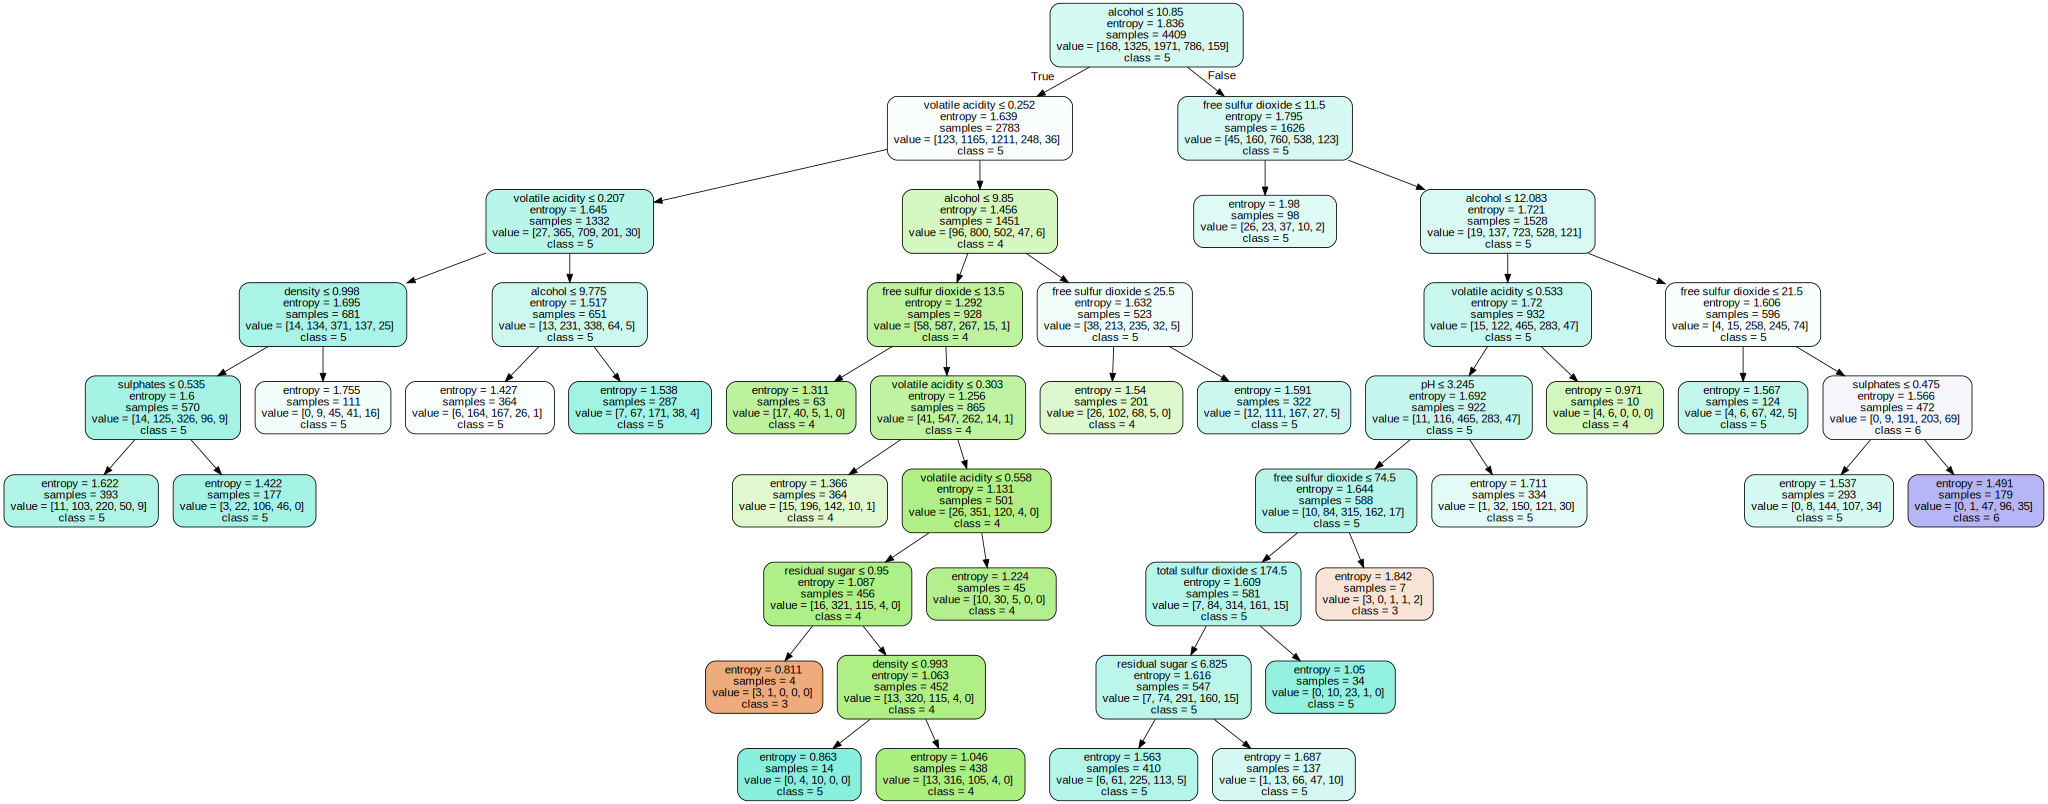

In [150]:
#decision tree graph
import graphviz 
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file= None, 
                                feature_names=feature.columns,
                                class_names=['3','4','5','6','7','8'],
                                filled=True, rounded=True,
                                special_characters=True)
#graph = graphviz.Source(dot_data)
graph = graphviz.Source(dot_data)  
graph 

In [10]:
#K-Fold Random Forest
precision = []
recall = []
f_score = []
Error = []
for train_index, test_index in kf:
    feature_train, target_train = np.array(feature)[train_index], np.array(target)[train_index]
    feature_test, target_test = np.array(feature)[test_index], np.array(target)[test_index]
    clf = RandomForestClassifier(random_state=0)
    clf.fit(feature_train, target_train)
    target_predicted = clf.predict(feature_test)
    #for t in target_predicted:
    #    t[0] = int(round(t[0]))
    precision.append(precision_score(target_predicted, target_test, average = 'weighted'))
    recall.append(recall_score(target_predicted, target_test, average = 'weighted'))
    f_score.append(f1_score(target_predicted, target_test, average = 'weighted'))
    Accuracy.append(accuracy_score(target_predicted, target_test))

    targetest = np.array(target_test).tolist()
    targettest = []
    for x in targetest:
        targettest += x
    #Error.append((sum((sum(abs(targettest - target_predicted)**2))/len(targettest)))/len(targettest))
    #print((sum((sum(abs(targettest - target_predicted)**2))/len(targettest)))/len(targettest))
    #print(Error)
precision = np.mean(precision)
recall = np.mean(recall)
f_score = np.mean(f_score)
Accuracy = np.mean(Accuracy)
print('precision:',precision)
print('recall:',recall)
print('f_score:',f_score)
print('Error:',Error)
print('Accuracy:',Accuracy)

/Users/shenyuchen/anaconda/envs/test_py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


AttributeError: 'numpy.float64' object has no attribute 'append'

In [12]:
#K-Fold LinearSVC
precision = []
recall = []
f_score = []
Error = []
for train_index, test_index in kf:
    feature_train, target_train = np.array(feature)[train_index], np.array(target)[train_index]
    feature_test, target_test = np.array(feature)[test_index], np.array(target)[test_index]
    clf = LinearSVC(C = 1, random_state=0)
    clf.fit(feature_train, target_train)
    target_predicted = clf.predict(feature_test)
    precision.append(precision_score(target_predicted, target_test, average = 'weighted'))
    recall.append(recall_score(target_predicted, target_test, average = 'weighted'))
    f_score.append(f1_score(target_predicted, target_test, average = 'weighted'))
    targetest = np.array(target_test).tolist()
    targettest = []
    for x in targetest:
        targettest += x
    Error.append((sum(abs(targettest - target_predicted)**2))/len(targettest))

precision = np.mean(precision)
recall = np.mean(recall)
f_score = np.mean(f_score)
Accuracy = np.mean(Accuracy)
print('precision:',precision)
print('recall:',recall)
print('f_score:',f_score)
print('Accuracy:',Accuracy)

/Users/shenyuchen/anaconda/envs/test_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shenyuchen/anaconda/envs/test_py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/shenyuchen/anaconda/envs/test_py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


precision: 0.861899884593
recall: 0.367306456325
f_score: 0.473628265298
Accuracy: 0.520413171404


In [142]:
'''#LinearSVC
clf = LinearSVC(C = 100, random_state=0)
clf.fit(feature_train, target_train)

target_predicted = clf.predict(feature_test)

# Print the classification report
print(metrics.classification_report(target_test, target_predicted))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(target_test, target_predicted)
print(clf.score(feature_test, target_test))
targetest = np.array(target_test).tolist()
targettest = []
for x in targetest:
    targettest += x
SSE = (sum(abs(targettest - target_predicted)**2))/len(targettest)
print(SSE)'''

'#LinearSVC\nclf = LinearSVC(C = 100, random_state=0)\nclf.fit(feature_train, target_train)\n\ntarget_predicted = clf.predict(feature_test)\n\n# Print the classification report\nprint(metrics.classification_report(target_test, target_predicted))\n\n# Print and plot the confusion matrix\ncm = metrics.confusion_matrix(target_test, target_predicted)\nprint(clf.score(feature_test, target_test))\ntargetest = np.array(target_test).tolist()\ntargettest = []\nfor x in targetest:\n    targettest += x\nSSE = (sum(abs(targettest - target_predicted)**2))/len(targettest)\nprint(SSE)'

In [36]:
#Kfold linear regression
from sklearn.neighbors import KNeighborsClassifier
precision = []
recall = []
f_score = []
Error = []
for train_index, test_index in kf:
    feature_train, target_train = np.array(feature)[train_index], np.array(target)[train_index]
    feature_test, target_test = np.array(feature)[test_index], np.array(target)[test_index]
    clf = KNeighborsClassifier(n_neighbors=200)
    clf.fit(feature_train, target_train)
    target_predicted = clf.predict(feature_test)
#     clf.score(feature_train,target_train)
#     for t in target_predicted:
#         t[0] = int(round(t[0]))
    precision.append(precision_score(target_predicted, target_test, average = 'weighted'))
    recall.append(recall_score(target_predicted, target_test, average = 'weighted'))
    f_score.append(f1_score(target_predicted, target_test, average = 'weighted'))
    targetest = np.array(target_test).tolist()
    targettest = []
    for x in targetest:
        targettest += x
    #Error.append((sum((sum(abs(targettest - target_predicted)**2))/len(targettest)))/len(targettest))
    #print((sum((sum(abs(targettest - target_predicted)**2))/len(targettest)))/len(targettest))
    #print(Error)
precision = np.mean(precision)
recall = np.mean(recall)
f_score = np.mean(f_score)
Accuracy = np.mean(Accuracy)
print('precision:',precision)
print('recall:',recall)
print('f_score:',f_score)
print('Error:',Error)
print('Accuracy:',Accuracy)

/Users/Nathan/anaconda/envs/Py501/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/Users/Nathan/anaconda/envs/Py501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/Nathan/anaconda/envs/Py501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


precision: 0.713076452896
recall: 0.457749676558
f_score: 0.542349988916


/Users/Nathan/anaconda/envs/Py501/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Nathan/anaconda/envs/Py501/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [45]:
#clustering
from sklearn.cluster import KMeans
#cluster=50
resultofpur=[]
for cluster in range(5,100,1):
    estimators=KMeans(n_clusters=cluster)
    estimators.fit(feature_train)
    estimators=estimators.predict(feature_test)
    pur=[]
    for k in range(cluster):
        ls=[0]*10
        for i in range(len(estimators)):
            if estimators[i]==k:
                ls[int(target_test[i])]+=1
        submax=0
        label=-1
        for i in range(len(ls)):
            if ls[i]>submax:
                submax=ls[i]
                label=i
        pur.append(submax)
    s=0
    for i in pur:
        s+=i
    #print(s/len(estimators))
    resultofpur.append(s/len(estimators))

92 0.6032719836400818


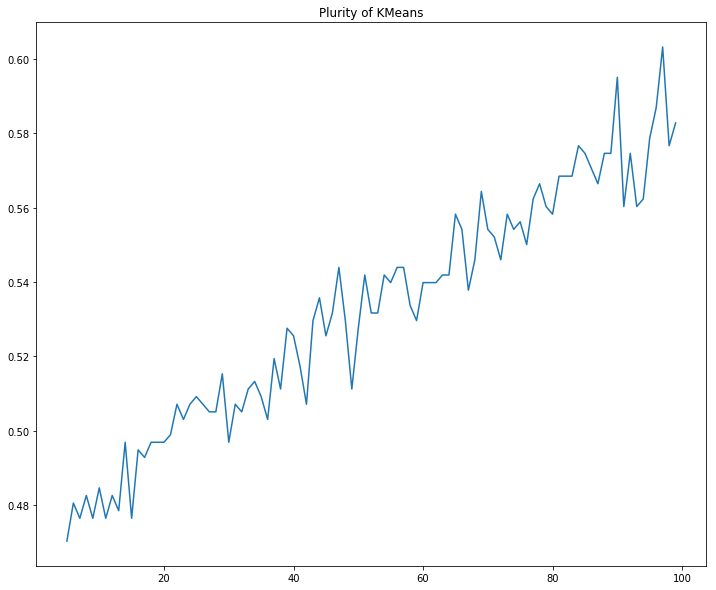

In [48]:
x_bar=[]
for i in range(5,100,1):
    x_bar.append(i)
#plt.bar(x_bar, resultofpur, align='center', alpha=0.5)
plt.plot(x_bar,resultofpur)
plt.title('Plurity of KMeans')
maxpur=0
k=0
for i in range(95):
    if resultofpur[i]>maxpur:
        maxpur=resultofpur[i]
        k=i
print(k,maxpur)

### Problem 3: The Hacking Part  (20 points)


* Data Collection
* Implement a small Demo/Prototype/experiment result figures for the "product" of your data science company. You could use this demo during the Pitch


In the software, we use classification to build the model and get a quality prediction program

In [128]:
# model constuction part
import numpy as np
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn import tree
from sklearn import linear_model
from sklearn.cross_validation import KFold, ShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score 
def program(feature, target):
    feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.25, random_state = 0)
    clf = LinearSVC(C = 1, random_state=0)
    clf.fit(feature_train, target_train)
    return clf

When wine producer give us new wine, we can detect them and have their quality prediction

In [129]:
def demo_software(new_wine):
    quality_predicted = clf.predict(new_wine)
    return quality_predicted

An example of running our program

In [130]:
#Insert model buiding data
clf = program(feature, target)
NEW_wine = [[0.32,7,0.045,30,136,0.9949,3.18,0.47,9.6]]
quality = demo_software(NEW_wine)
print(quality)

/Users/shenyuchen/anaconda/envs/test_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]


*------------------------

### Problem 4: Prepare a 90 second Pitch and *present* it in the class (20 points)

* Prepare the slide(s) for the Pitch (10 points)
* Present it in the class (10 points).

*Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person on the team to give the 90 second pitch (though a very organized multi-person 90 second pitch can be very impressive!) *



# Report: communicate the results (20 points)

(1) (5 points) What is your business proposition?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: **NOTE, for this Case Study you need to prepare two (2) PPT files!**  One for the 90 second Pitch and one for a normal 10 minute presentation.

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.

     (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 4 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **